In [ ]:
PAN CARD TAMPERING DETECTION 



In [5]:
# if you have not installed skimage use !pip intsall skimage first 

In [8]:
from skimage import metrics

In [9]:
from skimage.metrics import structural_similarity

In [12]:
!pip install imutils

In [16]:

!pip install opencv-python


In [ ]:
pip install imutils

In [17]:
import imutils
import cv2


In [18]:
from PIL import Image

In [19]:
import requests

In [25]:
!mkdir pan_card_temp


A subdirectory or file pan_card_temp already exists.


In [26]:
!mkdir pan_card_temp\image

In [29]:
original= Image.open(requests.get('https://th.bing.com/th/id/OIP.g5koZG3w4G6qI3OX2MYGOgHaEK?w=314&h=180&c=7&r=0&o=5&dpr=1.25&pid=1.7',stream=True).raw)
tampered= Image.open(requests.get('https://th.bing.com/th/id/OIP.lSKXH_UlAcrZRC8H9yRY5gHaEZ?w=274&h=180&c=7&r=0&o=5&dpr=1.25&pid=1.7',stream=True).raw)


In [30]:
print("original image format",original.format)
print("tampered image format",tampered.format)

original image format JPEG
tampered image format JPEG


In [31]:
print("original image format",original.size)
print("tampered image format",tampered.size)

original image format (392, 225)
tampered image format (342, 225)


In [34]:
original=original.resize((250,160))
tampered=tampered.resize((250,160))
original.save('pan_card_temp/image/original.png')
tampered.save('pan_card_temp/image/tampered.png')


In [36]:
print(original.size)

(250, 160)


In [37]:
print(tampered.size)

(250, 160)


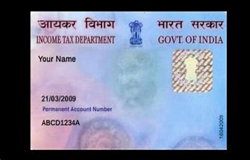

In [38]:
original

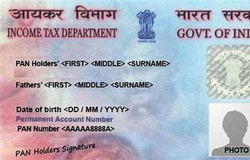

In [39]:
tampered

In [40]:
original=cv2.imread('pan_card_temp/image/original.png')
tampered=cv2.imread('pan_card_temp/image/tampered.png')


In [41]:
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [51]:
(score,diff)=structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff*255).astype("uint8")
print("SSIM:{}".format(score))

SSIM:0.1464742627752256


In [52]:
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [53]:
for c in cnts:

    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

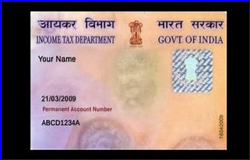

In [54]:
Image.fromarray(original)

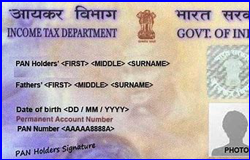

In [55]:
Image.fromarray(tampered)

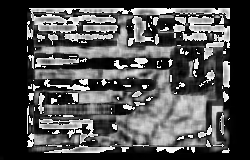

In [56]:
Image.fromarray(diff)

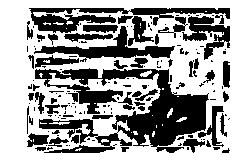

In [57]:
Image.fromarray(thresh)

In [ ]:
#thus from the above images we can conclude that the two images are different.
